<div style="text-align: right">ADAN7900 Lecture 2</div>
<div style="text-align: right">Prof. Stefano Parravano, 09/05/20225</div>

## OLS Example Problem

Given the data: $(x_i,y_i)$: (2,1),(5,2),(7,3),(8,3).

Find a linear model of the form:

$$ y = \beta_0 + \beta_1 x $$

that fits the data provided. Use OLS.

Step 1: Create the design matrix

$$ X = \begin{bmatrix} 1 & 2 \\ 1 & 5 \\ 1 & 7 \\ 1 & 8 \end{bmatrix}$$

Step 2: take note of the observation vector and the parameter vector.

parameter vector:
$$\vec{\beta} = \begin{bmatrix} \ \beta_0 \\ \beta_1 \end{bmatrix} $$

observation vector:
$$\vec{y} = \begin{bmatrix} \ 1 \\ 2 \\ 3 \\ 3 \end{bmatrix} $$

Step 3: Express the problem in the language of matrix alegebra:

$$ X\vec{\beta} = \vec{y} $$

Step 4: Use normal equations to solve for $\hat{\beta}$

$$ X^TX\hat{\beta} = X^T\vec{y} $$

$$\implies$$

$$ \hat{\beta} = (X^TX)^{-1} X^T\vec{y} $$

Step 5: Use python to perform the computation. This is what you will have to figure out :). PLease use the sympy package to perform operations between matrices and vectors.

Step 6: Report your result.

$$ \hat{\beta} = \begin{bmatrix} \ \frac{2}{7} \\ \frac{5}{14} \end{bmatrix} $$

$$ \therefore y = \frac{2}{7} + \frac{5}{14} x $$

## Assignment:

Given the data provided below: x_feature et y_feature please fit a function of the form: $$ f(x) = ax^2 + bx + c $$  
where:  
$$ (a,b,c) \in \mathbf{R}$$  
and of course let's not forget:  
$$ a \neq 0 $$  

Use OLS and do not use a package to estimate the unknown parameters $\hat\beta$ (a,b,c).

You must follow the step by step outlined in the example problem above.

In addition, you are required to:
 + compute the residual vector: $\epsilon = \vec{y} - X \hat{\beta}$
 + compute the norm of the residual vector (what does this represent)? Provide a description in plain english.
 + plot your data and the best fit line you estimated.
 + Compute the RMSE and compare it against the RMSE reported in the OLS_gradientDescent notebook (model was fit on the same data using Gradient Descent as opposed to the closed form solution). Are the estimates different? Comment on this.
 

You may notice that in te OLS_gradientDescent notebook the features are normalized before the training process.

Please perform the model fitting (training) using non-normalized features first and then repeat the entire process using normalized features. Take note of the differences and provide meaningful commentary.

NOTE: I provide the function to normalize a feature vector.

As a Final Step: Use R or any software/language of your choosing to perform OLS regression on the sample dataset provided. Do you get the same resutls?

## Solution

In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize_tensor_0_1(tensor):
    min_ten=min(tensor)
    max_ten=max(tensor)
    norm_ten=(tensor - min_ten)/(max_ten-min_ten)
    return(norm_ten)

### Create y matrix and x features

In [3]:
y = Matrix([[7.3],[15.1],[17.2],[61.9],[12.3],[8],[11.6],[22.5],[6],[16.6],[32.2]])
x_feature = np.asarray([35.7,55.9,58.2,81.9,56.3,48.9,33.9,21.8,48.4,60.4,68.4])
y_feature = np.asarray([y[x] for x in range(y.shape[0])])

In [4]:
print(x_feature)
print(y_feature)

[35.7 55.9 58.2 81.9 56.3 48.9 33.9 21.8 48.4 60.4 68.4]
[7.30000000000000 15.1000000000000 17.2000000000000 61.9000000000000
 12.3000000000000 8 11.6000000000000 22.5000000000000 6 16.6000000000000
 32.2000000000000]


### Plot the data first to see what type of estimating equation we want

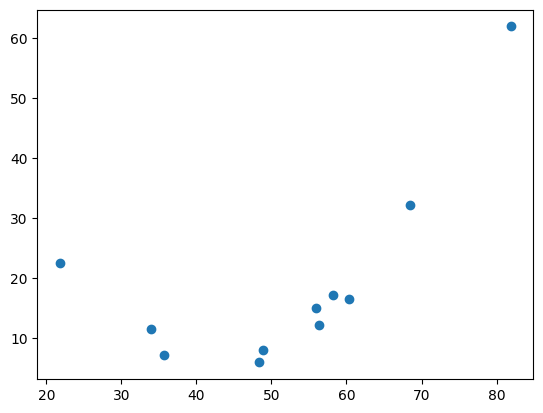

In [5]:
plt.scatter(x_feature, y_feature)

Looks like a quadratic function would best represent this function.

### Create the design Matix

Let's first create the design matrix `X`. Note that for this problem, we have 3 unkown variables, so for our design matrix, we must have 3 columns. We will say that column 1 represents the $x_i^2$ values, column 2 represents the $x_i$ values, and column 3 represents the constant value $c$.

In [6]:
constants = [1 for x in range(len(x_feature))]
# create the X design matrix
X = Matrix([(x_feature**2), x_feature, constants]).T
X


Matrix([
[1274.49, 35.7, 1],
[3124.81, 55.9, 1],
[3387.24, 58.2, 1],
[6707.61, 81.9, 1],
[3169.69, 56.3, 1],
[2391.21, 48.9, 1],
[1149.21, 33.9, 1],
[ 475.24, 21.8, 1],
[2342.56, 48.4, 1],
[3648.16, 60.4, 1],
[4678.56, 68.4, 1]])

### Perform OLS regression to find $\hat\beta$ vector

Now, we will perform OLS regression using our design matrix `X` and observation vector `y`. Note that the resulting $\hat{\beta}$ vector will be of size $3x1$ since the design matrix has 3 columns.

In [7]:
# OLS Regression using the matrix closed form solution
beta_hat = (X.T*X).inv() * X.T*y

In [8]:
beta_hat

Matrix([
[0.0361959753727328],
[ -3.08939325442392],
[  72.7400574684358]])

In [9]:
a = beta_hat[0]
b = beta_hat[1]
c = beta_hat[2]

In [10]:
print(f"a estimate: {a}, b estimate: {b}, c estimate: {c}")

a estimate: 0.0361959753727328, b estimate: -3.08939325442392, c estimate: 72.7400574684358


In [11]:
y_fit = a*x_feature**2 + b*x_feature + c
y_fit

array([8.58012693829602, 13.1485203506078, 15.5418256824990,
       62.5072363010130, 13.5372384235665, 8.22090559813843,
       9.60640300156311, 22.5930598581318, 8.00466802346696,
       18.1894144170199, 30.7706014056924], dtype=object)

In [12]:
pred_output = X*beta_hat
pred_output

Matrix([
[8.58012693829602],
[13.1485203506078],
[ 15.541825682499],
[ 62.507236301013],
[13.5372384235665],
[8.22090559813843],
[9.60640300156311],
[22.5930598581318],
[8.00466802346696],
[18.1894144170199],
[30.7706014056924]])

### Plot the data point with line of best fit

Now, we are going to plot the actual data points with our line of best fit.

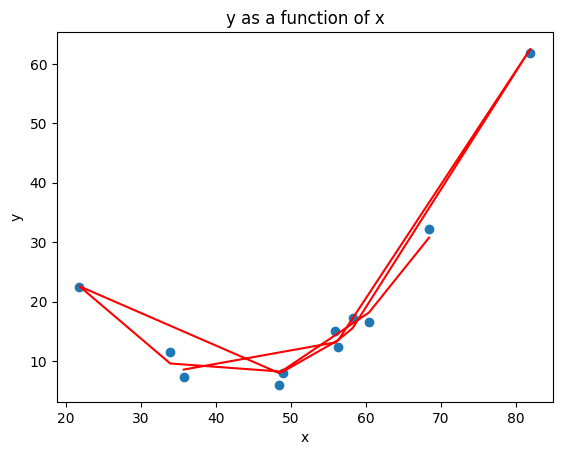

In [13]:
plt.scatter(x_feature, y_feature)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y as a function of x")
plt.plot(x_feature, pred_output, c = "red")
plt.show()

The reason why this graph looks so bad is because the x values in my design matrix are not sorted. So, first we must sort them.

### Updated graph with sorted x features to make line of best fit look better

To fix this we must create a design matrix with the sorted values of the x_features for the sole purpose of plotting.

In [14]:
x_feature_sorted = np.sort(x_feature)
X_sorted = Matrix([x_feature_sorted**2, x_feature_sorted, constants]).T
X_sorted


Matrix([
[ 475.24, 21.8, 1],
[1149.21, 33.9, 1],
[1274.49, 35.7, 1],
[2342.56, 48.4, 1],
[2391.21, 48.9, 1],
[3124.81, 55.9, 1],
[3169.69, 56.3, 1],
[3387.24, 58.2, 1],
[3648.16, 60.4, 1],
[4678.56, 68.4, 1],
[6707.61, 81.9, 1]])

In [15]:
X_sorted@beta_hat

Matrix([
[22.5930598581318],
[9.60640300156311],
[8.58012693829602],
[8.00466802346696],
[8.22090559813843],
[13.1485203506078],
[13.5372384235665],
[ 15.541825682499],
[18.1894144170199],
[30.7706014056924],
[ 62.507236301013]])

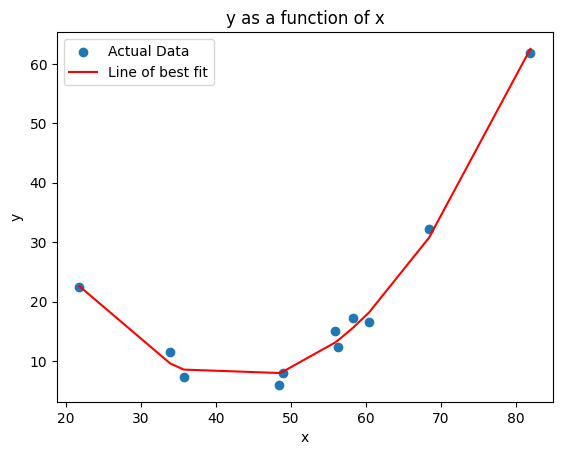

In [16]:
plt.scatter(x_feature, y_feature, label = "Actual Data")
plt.plot(x_feature_sorted, X_sorted*beta_hat, c = "red", label = "Line of best fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y as a function of x")
plt.legend()

In [17]:
est_1 = (x_feature[0]**2)*beta_hat[0] + x_feature[0]*beta_hat[1] + beta_hat[2] 
est_1

8.58012693829602

In [18]:
y_estimates = X@beta_hat
y_estimates

Matrix([
[8.58012693829602],
[13.1485203506078],
[ 15.541825682499],
[ 62.507236301013],
[13.5372384235665],
[8.22090559813843],
[9.60640300156311],
[22.5930598581318],
[8.00466802346696],
[18.1894144170199],
[30.7706014056924]])

### Computing the residual vector

Now we will compute the residual vector. This vector will contain the residual for each value of x. 

In [19]:
# Residual is actual value minus the predicted value.
res_vector = y - (y_estimates)
res_vector

Matrix([
[  -1.28012693829602],
[   1.95147964939222],
[   1.65817431750096],
[ -0.607236301012968],
[  -1.23723842356646],
[  -0.22090559813843],
[   1.99359699843689],
[-0.0930598581318094],
[  -2.00466802346696],
[  -1.58941441701986],
[   1.42939859430761]])

### Computing the Norm of the residual vector

In [20]:
res_vector.norm()

4.76613423402983

### Computing the Root Mean Squared Error

The formula for RMSE is $\sqrt(\frac{1}{N}\sum_{i=1}^{n}\big(y_i-f(x_i)\big)^2)$

Let's write a function that calculates the RMSE for us.

In [21]:
def rmse(vector):
    # First squaring all of the residual terms
    sq_error = [x**2 for x in vector]
    sum_sq_error = sum(sq_error)
    mean_sq_error = sum_sq_error / len(vector)
    return mean_sq_error**0.5

rmse(res_vector)
    

1.43704354134044

On averge, our predicitions were off by about 1.4370 units which is actaully slightly less than the RMSE of 1.4371 units for the gradient descent procedure.

In [22]:
def ols_regression(x_vec, y_vec):
    const = [1 for x in range(len(x_feature))]
    design_mat = Matrix([x_vec**2, x_vec, const]).T
    y_mat = Matrix(y_vec)
    return (design_mat.T*design_mat).inv()*(design_mat.T*y_mat)

In [23]:
ols_regression(x_feature, y_feature)

Matrix([
[0.036195975372733],
[-3.08939325442393],
[ 72.7400574684359]])